<a href="https://colab.research.google.com/github/ishaaa31/crime-rate-data-prediction-system/blob/main/IPL_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!pip install pandas
!pip install numpy
!pip install seaborn


In [5]:
match = pd.read_csv("/content/match.csv")

In [6]:
match.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
delivery = pd.read_csv("/content/delivery.csv")

In [8]:
delivery.head(10)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [9]:
#info of data
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [10]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [11]:
#you can describe the data too
match.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [12]:
delivery.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [16]:
#List of all the participating teams

all_teams = match['team1'].tolist() + match['team2'].tolist()
all_teams = list(set(all_teams))
all_teams


['Gujarat Lions',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiants',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Daredevils',
 'Kolkata Knight Riders',
 'Pune Warriors',
 'Sunrisers Hyderabad',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Delhi Capitals',
 'Mumbai Indians',
 'Royal Challengers Bangalore']

In [17]:
#Eliminator matches
match['eliminator'].value_counts()

N    799
Y     13
Name: eliminator, dtype: int64

<Axes: xlabel='eliminator', ylabel='count'>

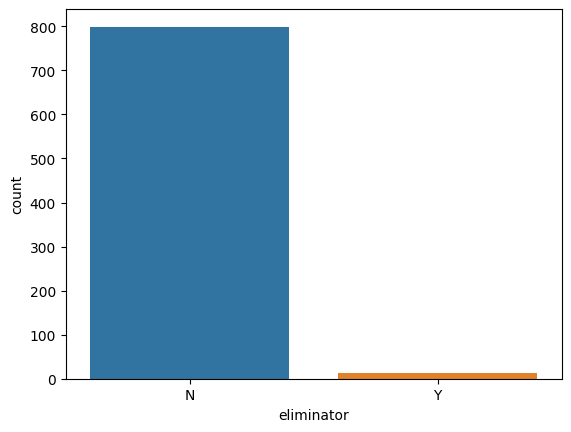

In [20]:
#Graphical view
import seaborn as sns

# Assuming 'match' is your DataFrame
sns.countplot(x='eliminator', data=match)

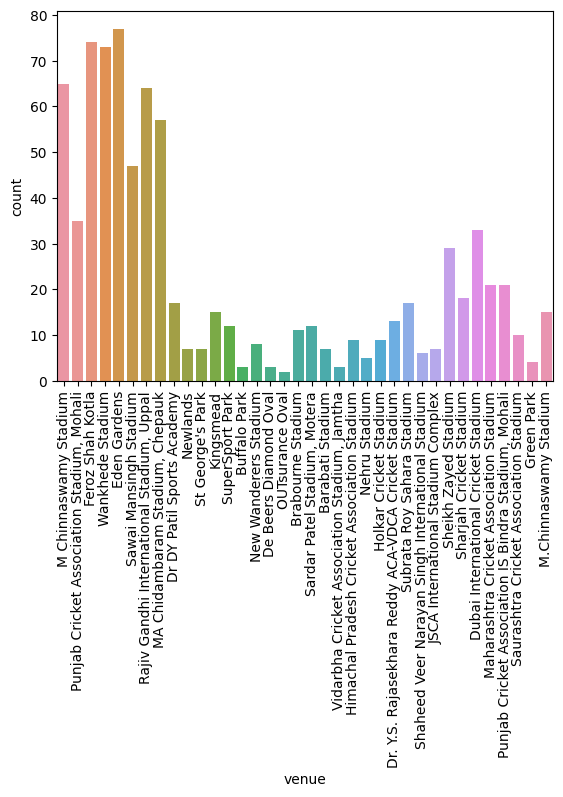

In [22]:
#We already know that there are a lots of venue ground of IPL matches

#Number of matches per venue ground

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'match' is your DataFrame
sns.countplot(x='venue', data=match)
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

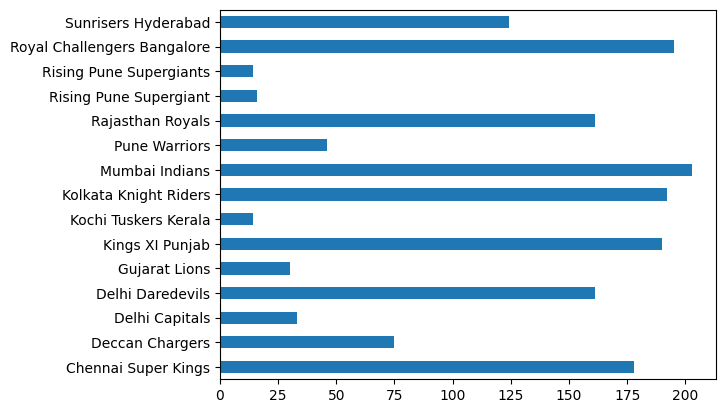

In [23]:
#Match per team

x = match['team1'].value_counts()
y = match['team2'].value_counts()
(x+y).plot(kind='barh')

In [24]:
#Matches won by each team
x = pd.DataFrame({'winner':match['winner']}).value_counts()
print(x)

winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


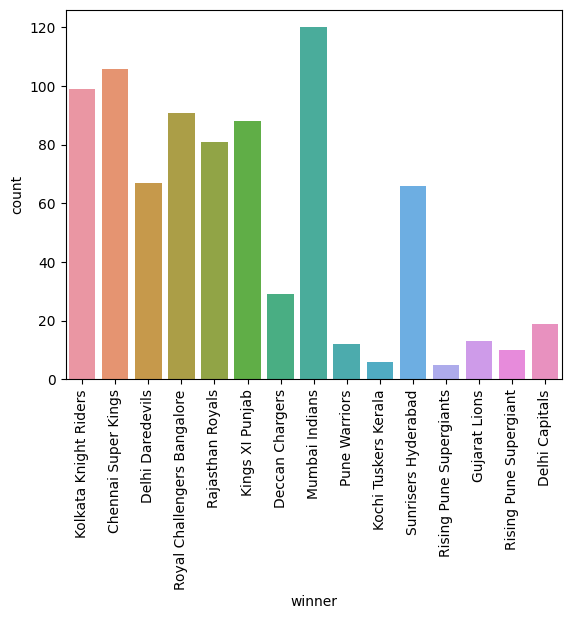

In [26]:
#graphical view

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'match' is your DataFrame
sns.countplot(x='winner', data=match)
plt.xticks(rotation='vertical')
plt.show()

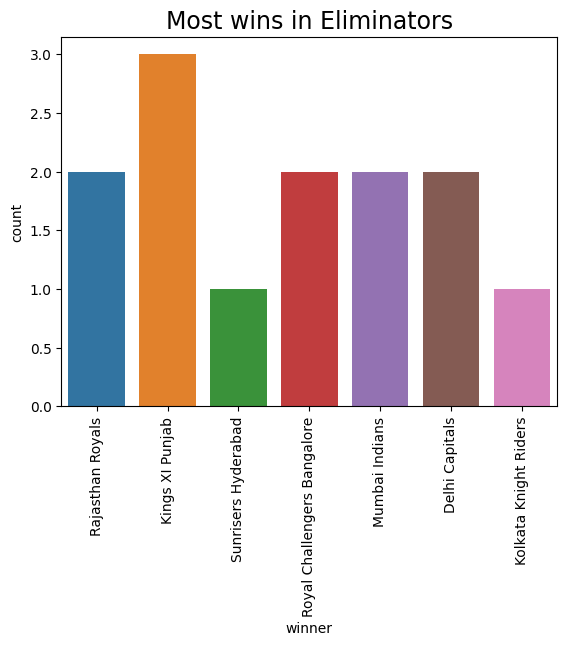

In [28]:
#Now let's see the most win in eliminators

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'match' is your DataFrame
eliminator_wins = match[match['eliminator'] == 'Y']  # Filter the data
sns.countplot(x='winner', data=eliminator_wins)
plt.title('Most wins in Eliminators', fontsize=17)
plt.xticks(rotation=90)
plt.show()

In [29]:
#Top 5 MOM(player)
temp_data = match['player_of_match'].value_counts().head()
print(temp_data)

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64


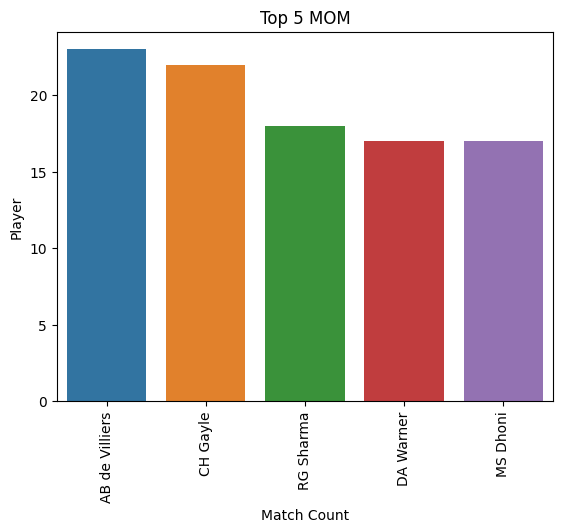

In [30]:
sns.barplot(x=temp_data.index, y=temp_data.values, data=match)
plt.title("Top 5 MOM")
plt.xticks(rotation=90)
plt.xlabel("Match Count")
plt.ylabel("Player")
plt.show()


In [32]:
#Now let's talk about deliveries

delivery.shape

(193468, 18)

In [35]:
top_batsman = delivery.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs', ascending=False).head(15)

In [36]:
top_batsman

,batsman,batsman_runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


<Axes: xlabel='batsman'>

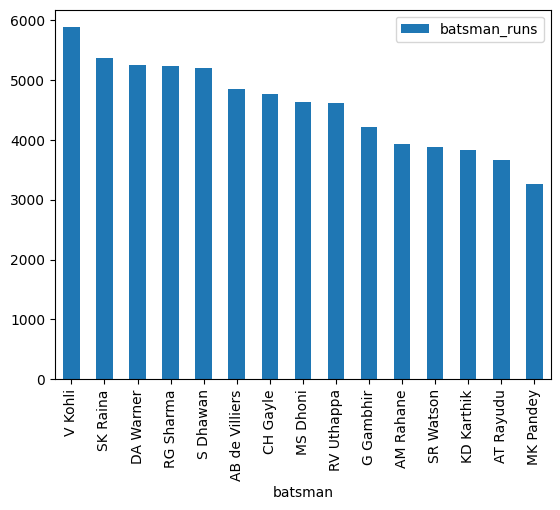

In [37]:
top_batsman.set_index('batsman', inplace=True)
top_batsman.plot(kind='bar')

In [38]:
#Most numbers of runs given by a bowler
#Top 15

delivery.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs',ascending=False).head(15)

,bowler,total_runs
276,PP Chawla,4330
133,Harbhajan Singh,4038
6,A Mishra,3913
99,DJ Bravo,3869
281,R Ashwin,3756
396,UT Yadav,3672
293,RA Jadeja,3515
350,SL Malinga,3486
264,P Kumar,3342
57,B Kumar,3333


<Axes: xlabel='batting_team'>

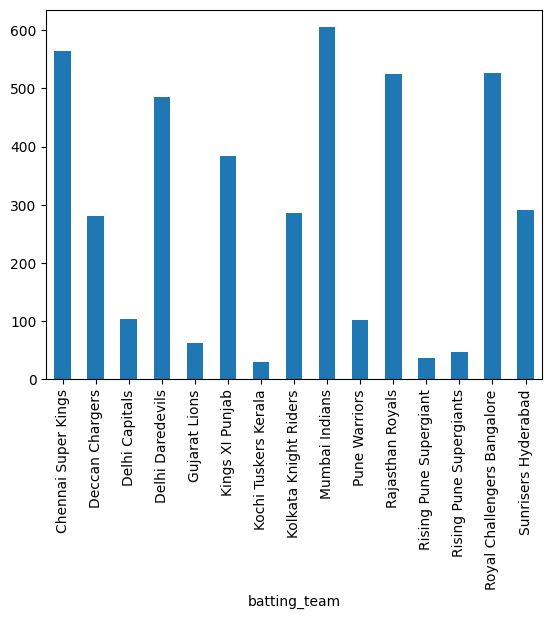

In [42]:
#Now let's talk about PP Chawla
mask = delivery['bowler'] == 'PP Chawla'
delivery[mask].groupby('batting_team')['total_runs'].agg('sum').plot(kind='bar')


In [45]:
#HeatMap
delivery6 = delivery[mask]
delivery6 = delivery6[['batting_team', 'over', 'batsman_runs']]
x = delivery6.pivot_table(values='batsman_runs', index=['batting_team'], columns='over', aggfunc='count')

<Axes: xlabel='over', ylabel='batting_team'>

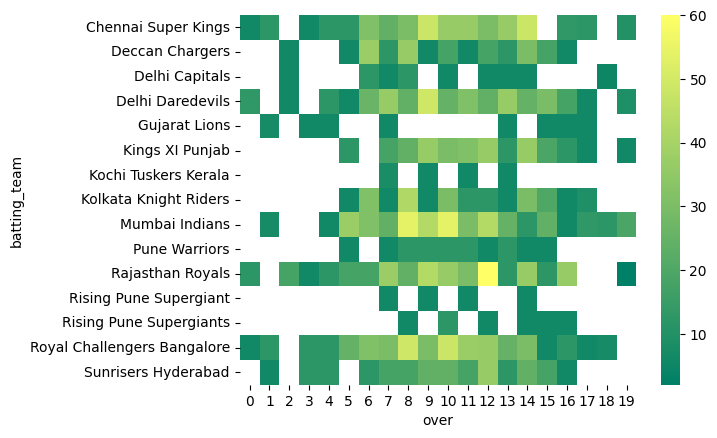

In [46]:
sns.heatmap(x, cmap='summer')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'run out'),
  Text(2, 0, 'bowled'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'retired hurt'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'caught and bowled'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

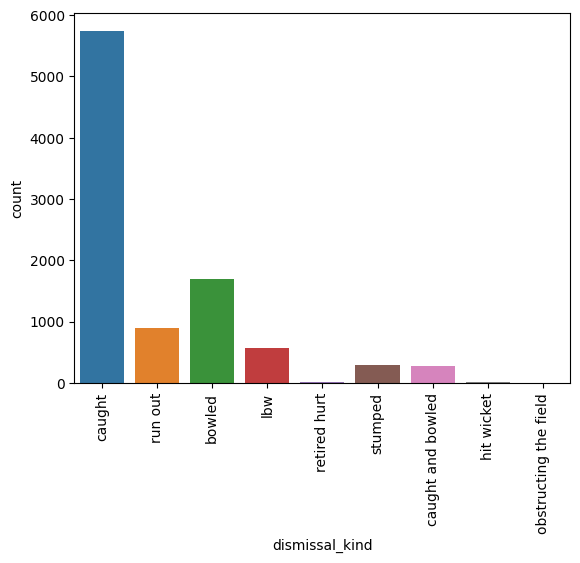

In [48]:
#Top Dismisal Kind

sns.countplot(x='dismissal_kind', data=delivery)
plt.xticks(rotation='vertical')

<Axes: xlabel='bowler'>

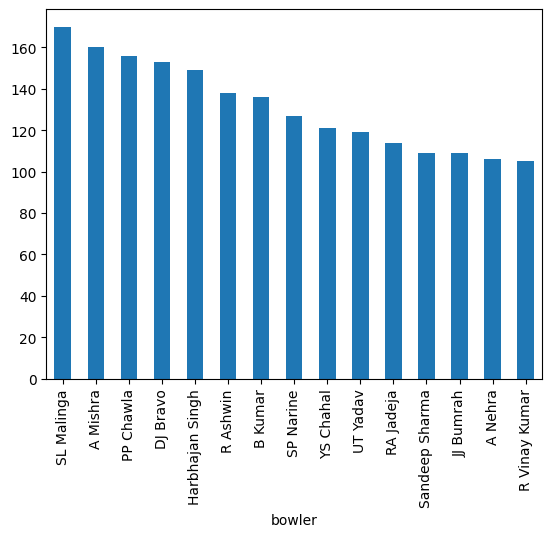

In [49]:
#Top 15 bowlers

mask1 = delivery['dismissal_kind'] == 'caught'
mask2 = delivery['dismissal_kind'] == 'bowled'
mask3 = delivery['dismissal_kind'] == 'lbw'
mask4 = delivery['dismissal_kind'] == 'caught and bowled'
mask5 = delivery['dismissal_kind'] == 'stumped'

new_del = delivery[mask1 | mask2 | mask3 | mask4 | mask5]

new_del.groupby('bowler')['player_dismissed'].agg('count').sort_values(ascending=False).head(15).plot(kind='bar')


In [50]:
#Top bowler is Malinga and batsman is Kohli
#Now let's see how many runs kohli scored against malinga

mask = delivery['bowler'] == 'SL Malinga'
mask2 = delivery['batsman'] == 'V Kohli'
delivery[mask].groupby('batsman')['batsman_runs'].agg('count').sort_values(ascending=False)['V Kohli']

38

In [53]:
#Most sixes by a batsman

temp_df = delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x == 6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).head(10)

In [54]:
temp_df

,batsman,batsman_runs
96,CH Gayle,349
24,AB de Villiers,235
301,MS Dhoni,216
379,RG Sharma,214
505,V Kohli,202
220,KA Pollard,198
116,DA Warner,195
438,SK Raina,194
456,SR Watson,190
398,RV Uthappa,163


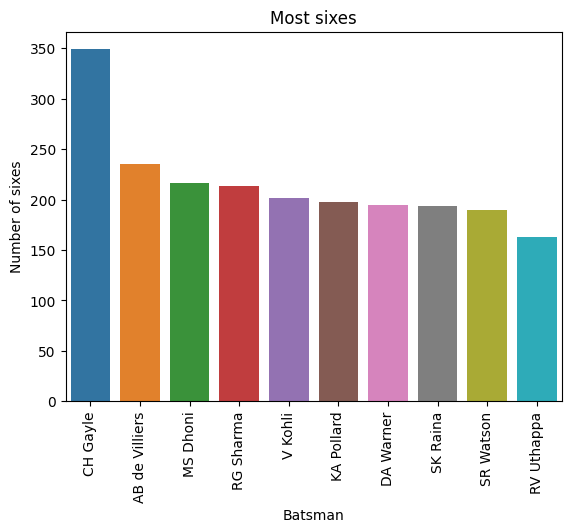

In [56]:
#Graphival view
sns.barplot(x = temp_df['batsman'], y = temp_df['batsman_runs'], data=temp_df)

plt.title("Most sixes")
plt.xticks(rotation=90)
plt.xlabel('Batsman')
plt.ylabel('Number of sixes')
plt.show()